<a href="https://colab.research.google.com/github/Vputri/Pemodelan_Simulasi/blob/main/Tugas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POISSON

In [1]:
from math import factorial, exp

def probablititas(x, miu = 1):
  poisson= ((miu**x) * exp(-miu)) / factorial(x)
  return poisson

def poison(n, p, miu = 1):
  hasil = (miu/n) * p
  return hasil

miu = 5
n = 10

pj = []
pj.append(probablititas(1, miu))

fj = []
fj.append(sum(pj))

for i in range(1, n):
  pj.append(poison(i, pj[-1], miu))
  fj.append(sum(pj))

In [2]:
def random(a, m, c, x0, n, k):
	x = []
	x.append(x0)
	for i in range(n-1):
		rand = (a * x[i] + c) % m
		x.append(rand)
	return x

a = 7
m = 99
c = 6
x0 = 3
n = 10
k = 10

xi = random(a, m, c, x0, n, k)
U = [(i/m) for i in xi]

In [3]:
hasil = []

for i in range(len(U)):
	for j in range(len(fj)):
		if U[i] < fj[j]:
			hasil.append(j)
			break

In [4]:
import pandas as pd

xi = pd.DataFrame(xi,columns =['x[i]']) 
u = pd.DataFrame(U,columns =['U[i]']) 
hasil = pd.DataFrame(hasil,columns =['p[i]'])
result = pd.concat([xi, u, hasil], axis=1)
result

,x[i],U[i],p[i]
0,3,0.030303,0
1,27,0.272727,2
2,96,0.969697,3
3,84,0.848485,3
4,0,0.000000,0
5,6,0.060606,1
6,48,0.484848,2
7,45,0.454545,2
8,24,0.242424,2
9,75,0.757576,3


In [5]:
d = {'p':pj,'F':fj}
df = pd.DataFrame(d)
df

,p,F
0,0.033690,0.033690
1,0.168449,0.202138
2,0.421122,0.623260
3,0.701869,1.325130
4,0.877337,2.202466
5,0.877337,3.079803
6,0.731114,3.810917
7,0.522224,4.333142
8,0.326390,4.659532
9,0.181328,4.840860


# Exponential

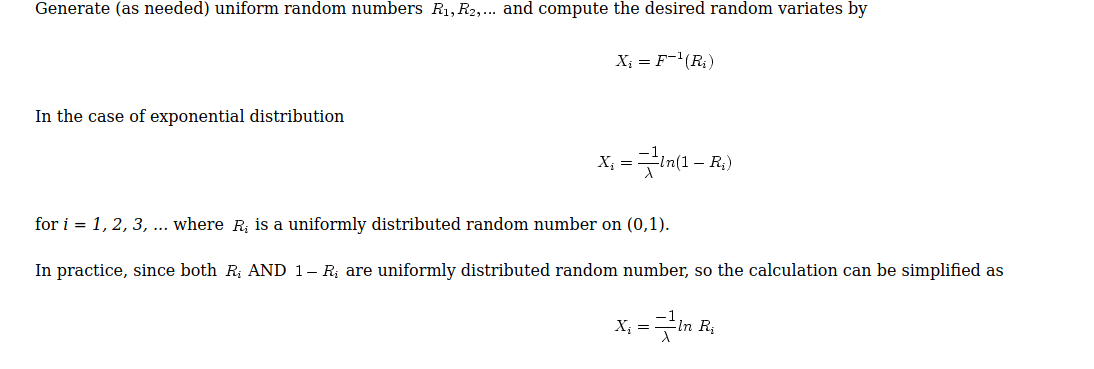

In [6]:
import math
import numpy as np
import time

def random(a = 1500, m = (2**30), n = 1, seed = 1):
  x = [] 
  x.append(seed)
  for i in range(n):
    temp = a*x[-1] % m
    x.append(temp)
  hasil = [i/m for i in x]
  hasil = np.array(hasil)
  return hasil

def uniform(low = 0, high = 1, seed = 1, n = 1):
  return low + (high-low) * random(seed = seed, n = n)

def pseudo_exp(lamb, jumlah=1):
  t = time.perf_counter()
  seed = 123456789
  U = uniform(seed = seed, n = jumlah)
  X = -(1/lamb) * (np.log(1-U))
  return X

pseudo_exp(10, jumlah=10)

array([0.01221429, 0.06295001, 0.12476349, 0.02551305, 0.15002658,
       0.05003971, 0.08328798, 0.16447053, 0.05038715, 0.12711189,
       0.02531297])

Sumber : [Exponential Distribution](https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node50.html)

# Bernoulli

In [7]:
import math
import numpy as np

def random(a = 1500, m = (2**30), n = 1, seed = 1):
  x = [] 
  x.append(seed)
  for i in range(n):
    temp = a*x[-1] % m
    x.append(temp)
  hasil = [i/m for i in x]
  hasil = np.array(hasil)
  return hasil

def uniform(low = 0, high = 1, seed = 1, n = 1):
  return low + (high-low) * random(seed = seed, n = n)

def bernoulli(p = 0.5, size=1):
  bernoulli = []
  for _ in range(size):
    seed = 123456789
    B = uniform(seed = seed, n = size)
    U = (B <= p).astype(int)
    bernoulli.append(np.sum(U))

  return B

bernoulli(p = 0.5, size = 10)

array([0.11497809, 0.46714188, 0.71281679, 0.22518462, 0.77692914,
       0.39371014, 0.56520462, 0.80693054, 0.39581299, 0.71948242,
       0.22363281])